In [1]:
import os # Configure which GPU

if os.getenv("SIONNA_NO_PREVIEW"):
    no_preview = True
else:
    no_preview = False

resolution = [480,320] # increase for higher quality of renderings

# Define magic cell command to skip a cell if needed
from IPython.core.magic import register_cell_magic
from IPython import get_ipython

# Sionna imports
import sionna
from sionna.rt import load_scene, PathSolver
@register_cell_magic
def skip_if(line, cell):
    if eval(line):
        return
    get_ipython().run_cell(cell)

In [2]:
%matplotlib inline
import numpy as np

# Import Sionna RT components
from sionna.rt import load_scene, Transmitter, Receiver, PlanarArray, Camera

In [3]:
scene = load_scene("../data/room19-simple2-ver2.xml")

scene._scene_objects["table2"].radio_material.thickness = 0.001

for mat in scene._scene_objects.keys():
    tmp_mat = scene._scene_objects[mat].radio_material
    print(f"Material: {mat}, {tmp_mat.name}")
    print(f"Conductivity:", tmp_mat.conductivity)
    print(f"Relative permittivity:", tmp_mat.relative_permittivity)
    print(f"Thickness:", tmp_mat.thickness)
    print()

2025-04-21 15:11:11 WARN wrk0 [HDRFilm] Monochrome mode enabled, setting film output pixel format to 'luminance' (was rgb).

Material: table2, itu_wood
Conductivity: [0.0179982]
Relative permittivity: [1.99]
Thickness: [0.001]

Material: floor, itu_concrete
Conductivity: [0.123087]
Relative permittivity: [5.24]
Thickness: [0.1]

Material: ceiling, itu_ceiling_board
Conductivity: [0.00422927]
Relative permittivity: [1.48]
Thickness: [0.1]

Material: no-name-1, itu_plasterboard
Conductivity: [0.0275785]
Relative permittivity: [2.73]
Thickness: [0.1]



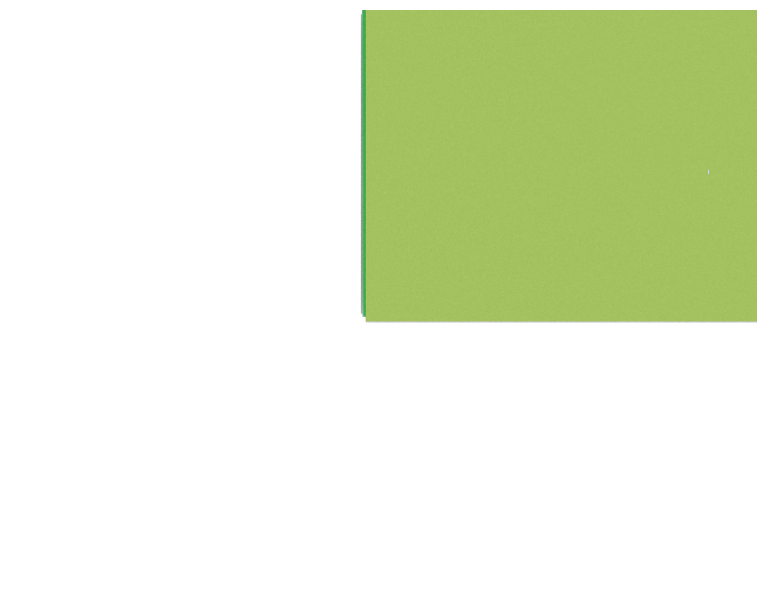

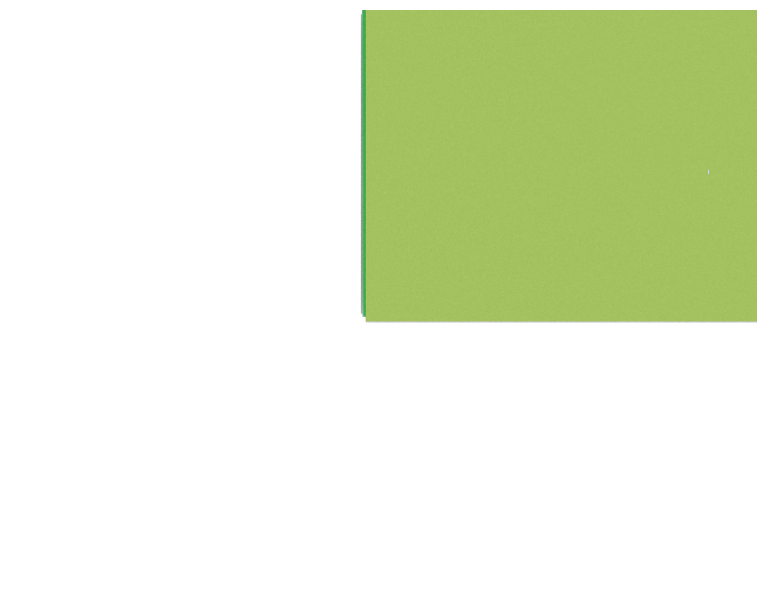

In [4]:
scene.tx_array = PlanarArray(num_rows=1,
                             num_cols=1,
                             vertical_spacing=0.5,
                             horizontal_spacing=0.5,
                             pattern="iso",
                             polarization="VH")

# Configure antenna array for all receivers
scene.rx_array = PlanarArray(num_rows=1,
                             num_cols=1,
                             vertical_spacing=0.5,
                             horizontal_spacing=0.5,
                             pattern="dipole",
                             polarization="cross")

# Create a receiver
rx = Receiver(name="rx1",
              position=[1.28, 0.927, 0.725],
              orientation=[0, -3.24/2, 0])

# Add receiver instance to scene
scene.add(rx)

exp1_pos = [2.719, 0.9383, 0.725]

tx1 = Transmitter(name="tx1",
                 position=exp1_pos)

exp1_pos = [2.719, 0.9383, 0.725]
scene.add(tx1)

p_solver  = PathSolver()
# Compute propagation paths
traced_paths1 = p_solver(scene=scene,
                 max_depth=5,
                 los=True,
                 specular_reflection=True,
                 diffuse_reflection=False,
                 refraction=True,
                 synthetic_array=False,
                 seed=41)

# Compute propagation paths
tmp_traced_paths = p_solver(scene=scene,
                max_depth=4,
                los=True,
                specular_reflection=True,
                diffuse_reflection=False,
                refraction=True,
                synthetic_array=False,
                seed=41)
# scene.remove(tx_names[1])
# Visualize paths in the scene
cam = Camera(position=[0,0,10],
                     orientation=np.array([0,np.pi/2,-np.pi/2]))
scene.render(camera=cam, paths=tmp_traced_paths) #, show_devices=True, ) #show_paths=True, resolution=resolution);

In [5]:
scene.preview(paths=tmp_traced_paths,
                     rm_metric="sinr",
                     rm_vmin=-10,
                     clip_at=5)

Renderer(camera=PerspectiveCamera(aspect=1.31, children=(DirectionalLight(intensity=0.25, position=(0.0, 0.0, …